In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
%matplotlib inline

In [2]:
df1 = pd.read_csv('diamonds.csv')

In [3]:
df1.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df1 = df1.drop(['Unnamed: 0'], axis = 1)

## EDA of Dependent Variable and Categorical Features

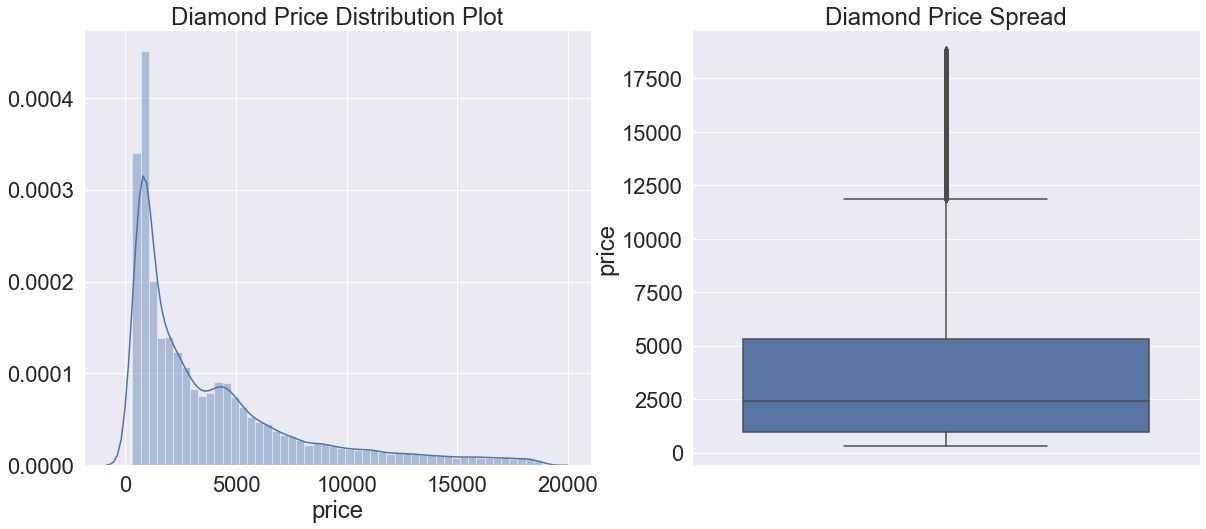

In [5]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Diamond Price Distribution Plot')
sns.distplot(df1.price)

plt.subplot(1,2,2)
plt.title('Diamond Price Spread')
sns.boxplot(y=df1.price)

plt.show()

*Inferences*:
- the price is right skewed
- most of the data is between 1000-5100 USD

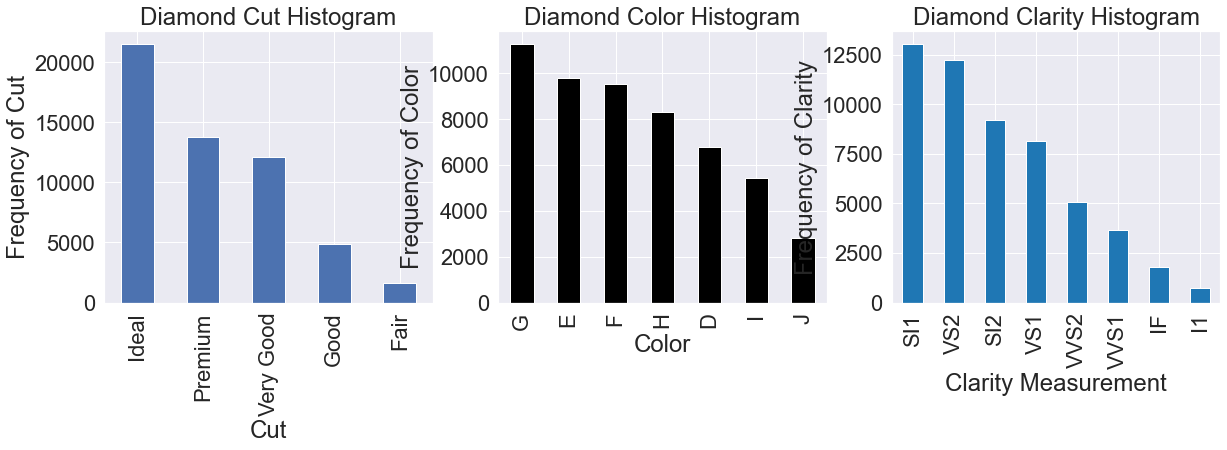

In [6]:
plt.figure(figsize=(20, 5))

plt.subplot(1,3,1)
plt1 = df1.cut.value_counts().plot(kind='bar')
plt.title('Diamond Cut Histogram')
plt1.set(xlabel = 'Cut', ylabel='Frequency of Cut')

plt.subplot(1,3,2)
plt1 = df1.color.value_counts().plot(kind='bar', color='black')
plt.title('Diamond Color Histogram')
plt1.set(xlabel = 'Color', ylabel='Frequency of Color')


plt.subplot(1,3,3)
plt1 = df1.clarity.value_counts().plot(kind='bar', color='tab:blue')
plt.title('Diamond Clarity Histogram')
plt1.set(xlabel = 'Clarity Measurement', ylabel='Frequency of Clarity')


plt.show()

/Users/chrischung/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/chrischung/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/chrischung/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/chrischung/anaconda

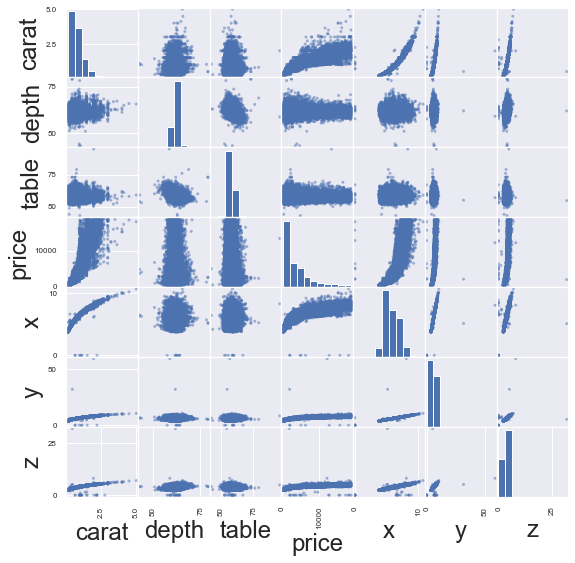

In [7]:
pd.plotting.scatter_matrix(df1,figsize  = [9, 9]);
plt.show()

In [8]:
df1.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


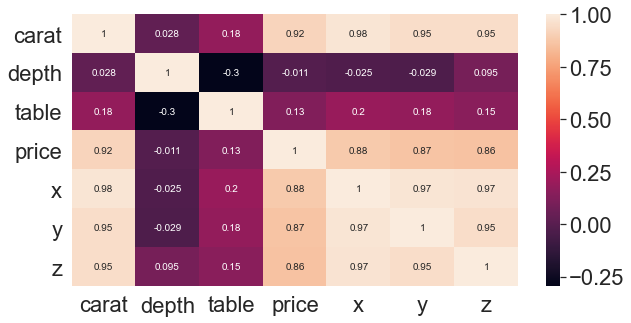

In [9]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(), annot=True)

In [10]:
data_pred = df1.drop(columns='price')

In [11]:
abs(data_pred.corr()) > 0.75

,carat,depth,table,x,y,z
carat,True,False,False,True,True,True
depth,False,True,False,False,False,False
table,False,False,True,False,False,False
x,True,False,False,True,True,True
y,True,False,False,True,True,True
z,True,False,False,True,True,True


In [12]:
df2 = df1.drop(columns=['x','y','z'])

In [13]:
df2.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335


In [14]:
#J is worst, D is best
df1.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [15]:
#clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
df1.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [16]:
1#cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
df1.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [17]:
#create dummy variables for categorical data
cut_dummies = pd.get_dummies(df2.cut, prefix='cut', drop_first=True)
color_dummies = pd.get_dummies(df2.color, prefix='col', drop_first=True)
clarity_dummies = pd.get_dummies(df2.clarity, prefix='clar', drop_first=True)

In [18]:
df2.drop(['cut','color','clarity'], axis = 1, inplace = True)

In [19]:
#concatinate dfs
df2 = pd.concat([df2, cut_dummies, color_dummies, clarity_dummies], axis=1)

In [20]:
df2.head()

,carat,depth,table,price,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,col_E,col_F,...,col_H,col_I,col_J,clar_IF,clar_SI1,clar_SI2,clar_VS1,clar_VS2,clar_VVS1,clar_VVS2
0,0.23,61.5,55.0,326,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [21]:
df2.columns

Index(['carat', 'depth', 'table', 'price', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'col_E', 'col_F', 'col_G', 'col_H',
       'col_I', 'col_J', 'clar_IF', 'clar_SI1', 'clar_SI2', 'clar_VS1',
       'clar_VS2', 'clar_VVS1', 'clar_VVS2'],
      dtype='object')

In [22]:
import numpy as np

In [23]:
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
# set x and y variables
X = df2.drop(columns='price')
y = np.log(df2['price'])
# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

In [24]:
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train) # make the predictions by the model
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          1.047e+06
Date:                Wed, 25 Mar 2020   Prob (F-statistic):                        0.00
Time:                        18:04:20   Log-Likelihood:                         -14327.
No. Observations:               40455   AIC:                                  2.869e+04
Df Residuals:                   40435   BIC:                                  2.887e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
carat             2.1889      0.004    524.945      0.000       2.181       2.197
depth             0.0482      0.001     76.018      0.000       0.047       0.049
table             0.0371      0.001     54.942      0.000       0.036       0.038
cut_Good          0.1602      0.011     14.003      0.000       0.138       0.183
cut_Ideal         0.3214      0.010     31.366      0.000       0.301       0.341
cut_Premium       0.2164      0.011     20.569      0.000       0.196       0.237
cut_Very Good     0.2190      0.011     20.740      0.000       0.198       0.240
col_E            -0.0509      0.006     -8.059      0.000      -0.063      -0.039
col_F            -0.0452      0.006     -7.075      0.000      -0.058      -0.033
col_G            -0.1239      0.006    -19.841      0.000      -0.136      -0.112
col_H            -0.2616      0.007    -39.352      0.000      -0.275      -0.249
col_I            -0.4201      0.007    -56.229      0.000      -0.435      -0.405
col_J            -0.5855      0.009    -63.664      0.000      -0.604      -0.567
clar_IF           1.1000      0.018     61.718      0.000       1.065       1.135
clar_SI1          0.7839      0.015     51.559      0.000       0.754       0.814
clar_SI2          0.6071      0.015     39.741      0.000       0.577       0.637
clar_VS1          0.9512      0.016     61.340      0.000       0.921       0.982
clar_VS2          0.8840      0.015     57.872      0.000       0.854       0.914
clar_VVS1         1.0151      0.016     61.824      0.000       0.983       1.047
clar_VVS2         0.9967      0.016     62.352      0.000       0.965       1.028
==============================================================================
Omnibus:                    11911.560   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            99574.902
Skew:                          -1.181   Prob(JB):                         0.00
Kurtosis:                      10.314   Cond. No.                     1.97e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
df_test = pd.DataFrame({'Actual': y_train, 'Predicted': predictions}) 
df_test

,Actual,Predicted
36946,6.171701,6.566316
36833,6.863803,7.068592
39060,6.964136,6.593643
39212,6.971669,7.222146
15923,8.759041,8.775312
...,...,...
27640,9.828710,10.339081
14501,8.675393,8.445007
30727,6.605298,6.918357
47323,6.272877,6.886451


In [26]:
y_pred = model.predict(X_test)

In [27]:
df_test2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df_test

,Actual,Predicted
36946,6.171701,6.566316
36833,6.863803,7.068592
39060,6.964136,6.593643
39212,6.971669,7.222146
15923,8.759041,8.775312
...,...,...
27640,9.828710,10.339081
14501,8.675393,8.445007
30727,6.605298,6.918357
47323,6.272877,6.886451


In [28]:
from sklearn import metrics 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2724528196214374
Mean Squared Error: 0.11936406908742526
Root Mean Squared Error: 0.34549105500349103


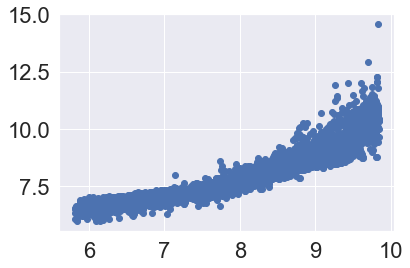

In [29]:
plt.scatter(y_test,y_pred)

In [30]:
## GAME PLAN

#Hypothesis testing - based on visuals
#significance btw 1 or 2 carats




## Taking a moment to transform inputs

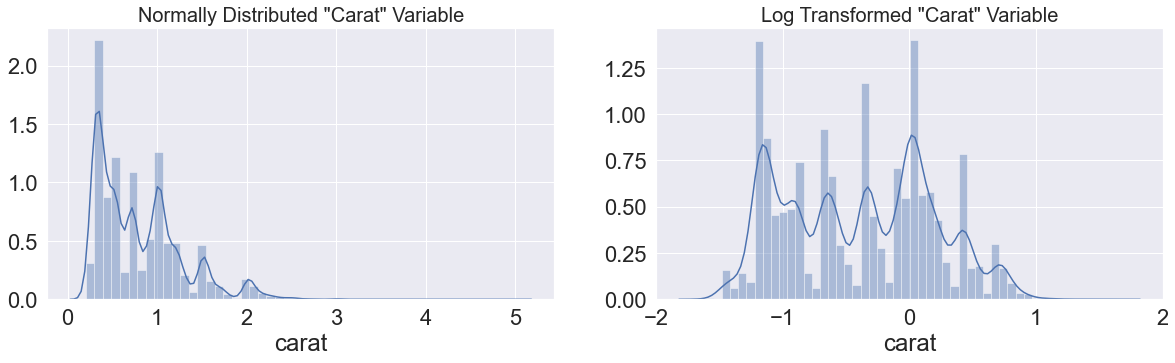

In [31]:
# np log carat because it seemed like an exponential distribution. Now it looks more normal.

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.distplot(df2.carat)
plt.title(fontsize=20, label='Normally Distributed "Carat" Variable')

plt.subplot(1,2,2)
sns.distplot(np.log(df2.carat))
plt.title(fontsize=20, label='Log Transformed "Carat" Variable');

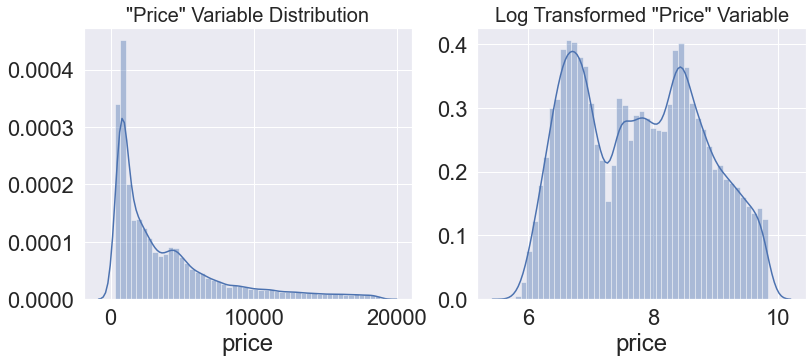

In [33]:
plt.figure(figsize=(20, 5))

plt.subplot(1,3,1)
sns.distplot(df2.price)
plt.title(fontsize=20, label='"Price" Variable Distribution');
plt.subplot(1,3,2)
sns.distplot(np.log(df2.price))
plt.title(fontsize=20, label='Log Transformed "Price" Variable');



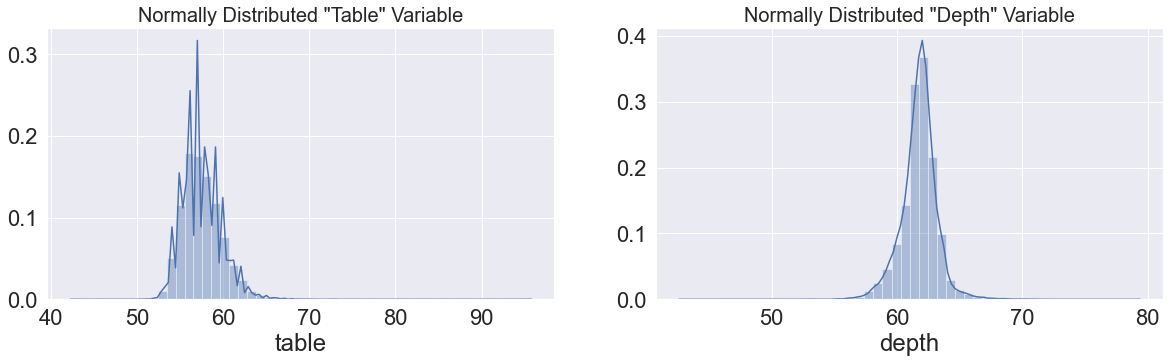

In [37]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.distplot(df2.table)
plt.title(fontsize=20, label='Normally Distributed "Table" Variable')

plt.subplot(1,2,2)
sns.distplot(df2.depth)
plt.title(fontsize=20, label='Normally Distributed "Depth" Variable');

### Forming Hypothesis Testing
Alternative Hypothesis : mu1 != m2 <br>
Null Hypothesis : mu1 == m2    <br>
mu1 = average price of logged 1 carat diamonds<br>
mu2 = average price of logged 2 carat diamonds

In [34]:
#no features cheating - data leakage